### Script to look at beersheba outputs

In [2]:
import sys,os,os.path
sys.path.append("../")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

from IC.invisible_cities.cities                 import beersheba as beerfun


from IC.invisible_cities.database.load_db       import DataSiPM

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_local_evt

from IC.invisible_cities.evm.event_model        import HitEnergy
from IC.invisible_cities.cities.beersheba          import DeconvolutionMode
from IC.invisible_cities.cities.beersheba          import CutType


from IC.invisible_cities.reco.deconv_functions import deconvolve
from IC.invisible_cities.reco.deconv_functions import deconvolution_input
from IC.invisible_cities.reco.deconv_functions import InterpolationMethod

import IC.invisible_cities.io.mcinfo_io as mcio


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [45]:
file_path = "../Isaura_full_reco_work/data/105_5E-3/"
cluster = pd.read_hdf(file_path + "beersheba_1_208Tl.h5", 'CHITS/lowTh')
local = pd.read_hdf(file_path + "beersheba_1_208Tl_local.h5", 'CHITS/lowTh')

In [46]:
display(cluster)

# select one event
cluster_evt = cluster[cluster['event'] == 0]
local_evt = local[local['event'] == 0]

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,0,1.373371e+06,0,368.346366,-174.196321,1,365.425,-194.375,0.0,0.0,773.807738,4.405797,434.085896,-1.0,0.001602,-1,-1.0
1,0,1.373371e+06,0,368.346366,-174.196321,1,396.525,-194.375,0.0,0.0,773.807738,5.043478,496.914104,-1.0,0.001834,-1,-1.0
2,0,1.373371e+06,0,368.346366,-174.196321,1,365.425,-209.925,0.0,0.0,776.835872,4.927536,185.874497,-1.0,0.000686,-1,-1.0
3,0,1.373371e+06,0,368.346366,-174.196321,1,365.425,-194.375,0.0,0.0,776.835872,16.115942,607.918968,-1.0,0.002245,-1,-1.0
4,0,1.373371e+06,0,368.346366,-174.196321,1,349.875,-178.825,0.0,0.0,776.835872,7.130435,268.971350,-1.0,0.000993,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148396,648,6.488070e+08,2,104.680861,-60.381546,1,116.625,-85.525,0.0,0.0,721.620441,4.173913,261.463410,-1.0,0.000833,-1,-1.0
148397,648,6.488070e+08,2,104.680861,-60.381546,1,116.625,-69.975,0.0,0.0,721.620441,4.000000,250.569104,-1.0,0.000798,-1,-1.0
148398,648,6.488070e+08,2,104.680861,-60.381546,1,116.625,-54.425,0.0,0.0,721.620441,8.173913,512.032514,-1.0,0.001630,-1,-1.0
148399,648,6.488070e+08,2,104.680861,-60.381546,1,132.175,-69.975,0.0,0.0,721.620441,4.173913,261.463410,-1.0,0.000833,-1,-1.0


Text(0.5, 1.0, 'DECO/Events Energy')

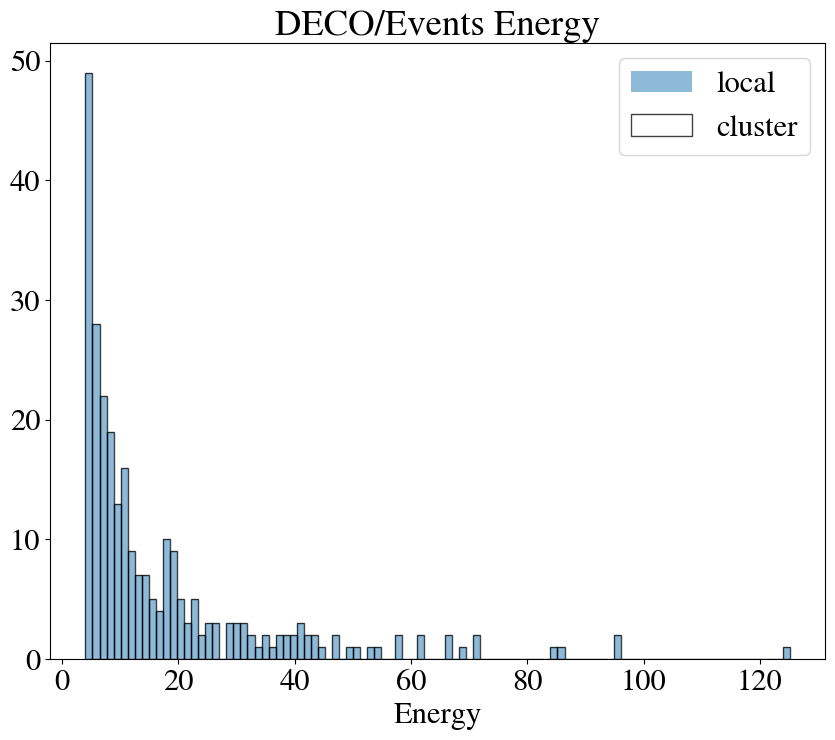

In [52]:
plt.hist(local_evt.Q, bins = 100, label = 'local', alpha = 0.5)
plt.hist(cluster_evt.Q, bins = 100, label = 'cluster', alpha = 0.75, fill = False)
plt.legend()
plt.xlabel("Energy")
plt.title("DECO/Events Energy")

Text(0.5, 0.98, 'Beersheba cluster output')

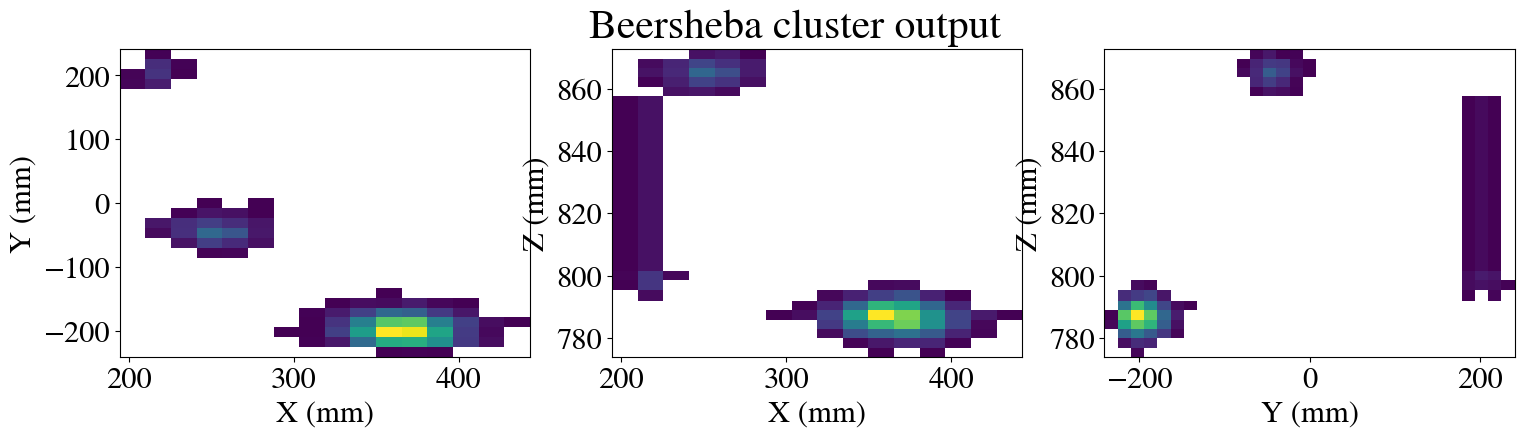

In [21]:
pitch = 15.55
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

xx = np.arange(cluster_evt.X.min(), cluster_evt.X.max() + pitch, pitch)
yy = np.arange(cluster_evt.Y.min(), cluster_evt.Y.max() + pitch, pitch)
zz = cluster_evt.Z.unique()

axes[0].hist2d(cluster_evt.X, cluster_evt.Y, bins=[xx, yy], weights=cluster_evt.Q, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(cluster_evt.X, cluster_evt.Z, bins=[xx, zz], weights=cluster_evt.Q, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(cluster_evt.Y, cluster_evt.Z, bins=[yy, zz], weights=cluster_evt.Q, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Beersheba cluster output', fontsize=30)

Text(0.5, 0.98, 'Beersheba local output')

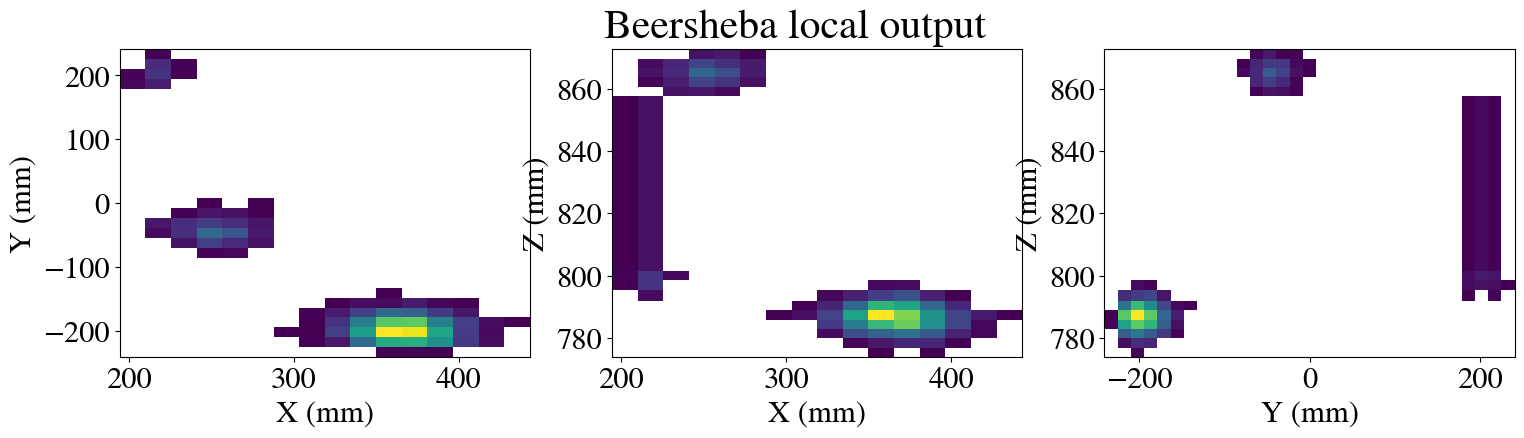

In [22]:
pitch = 15.55
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

xx = np.arange(local_evt.X.min(), local_evt.X.max() + pitch, pitch)
yy = np.arange(local_evt.Y.min(), local_evt.Y.max() + pitch, pitch)
zz = local_evt.Z.unique()

axes[0].hist2d(local_evt.X, local_evt.Y, bins=[xx, yy], weights=local_evt.Q, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(local_evt.X, local_evt.Z, bins=[xx, zz], weights=local_evt.Q, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(local_evt.Y, local_evt.Z, bins=[yy, zz], weights=local_evt.Q, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Beersheba local output', fontsize=30)

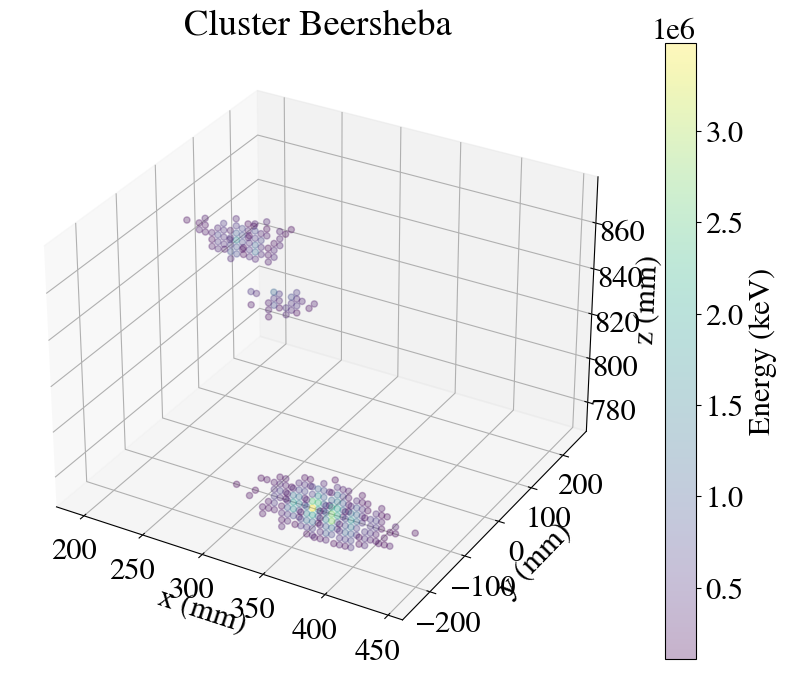

In [27]:
x = cluster_evt.X
y = cluster_evt.Y
z = cluster_evt.Z
e = cluster_evt.E*1000

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.title('Cluster Beersheba')
plt.show()

In [28]:
x = local_evt.X
y = local_evt.Y
z = local_evt.Z
e = local_evt.E*1000

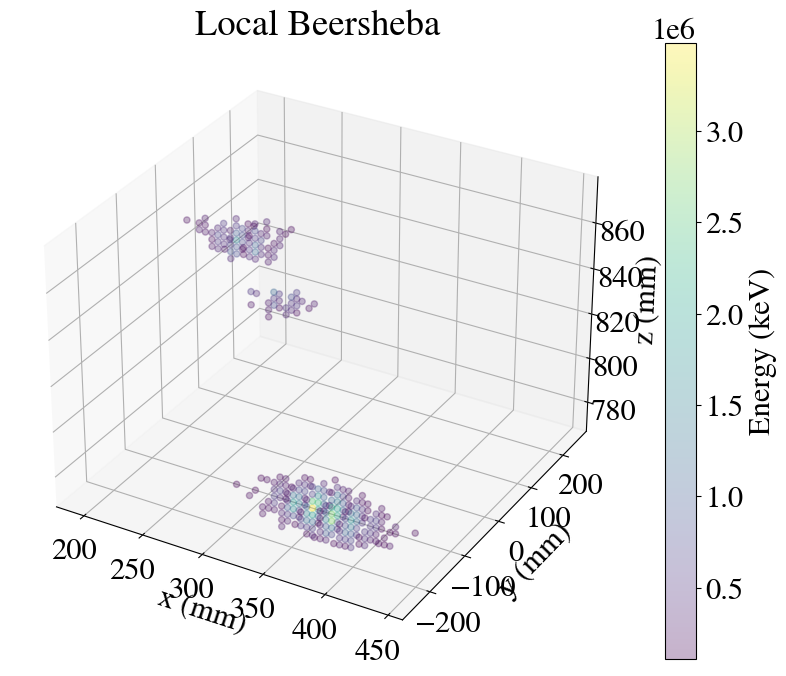

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(x, y, z, c=e, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.title('Local Beersheba')
plt.show()

In [30]:
cluster = pd.read_hdf(file_path + "beersheba_1_208Tl.h5", 'DECO/Events')
local = pd.read_hdf(file_path + "beersheba_1_208Tl_local.h5", 'DECO/Events')

In [31]:
# select one event
cluster_evt = cluster[cluster['event'] == 0]
local_evt = local[local['event'] == 0]

Text(0.5, 0.98, 'Beersheba local output')

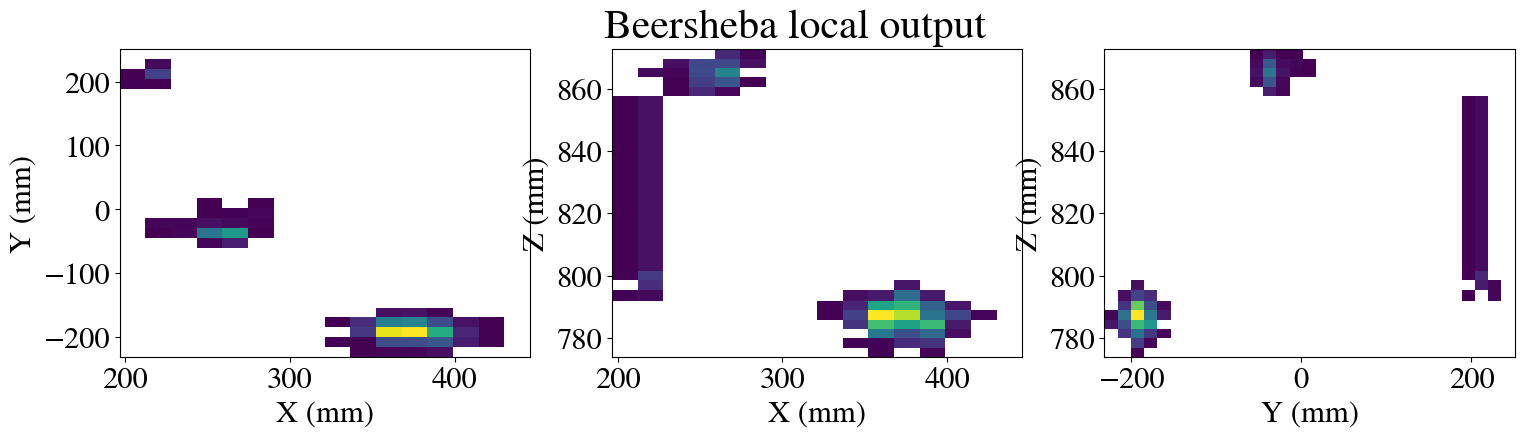

In [32]:
pitch = 15.55
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

xx = np.arange(local_evt.X.min(), local_evt.X.max() + pitch, pitch)
yy = np.arange(local_evt.Y.min(), local_evt.Y.max() + pitch, pitch)
zz = local_evt.Z.unique()

axes[0].hist2d(local_evt.X, local_evt.Y, bins=[xx, yy], weights=local_evt.E, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(local_evt.X, local_evt.Z, bins=[xx, zz], weights=local_evt.E, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(local_evt.Y, local_evt.Z, bins=[yy, zz], weights=local_evt.E, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Beersheba local output', fontsize=30)

Text(0.5, 0.98, 'Beersheba cluster output')

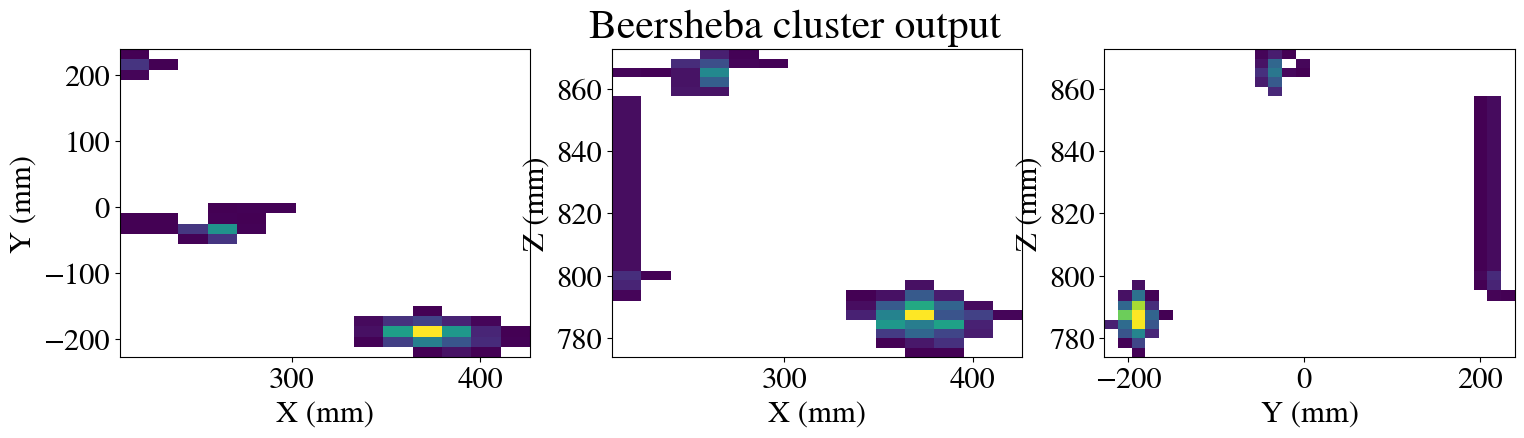

In [34]:
pitch = 15.55
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

xx = np.arange(cluster_evt.X.min(), cluster_evt.X.max() + pitch, pitch)
yy = np.arange(cluster_evt.Y.min(), cluster_evt.Y.max() + pitch, pitch)
zz = cluster_evt.Z.unique()

axes[0].hist2d(cluster_evt.X, cluster_evt.Y, bins=[xx, yy], weights=cluster_evt.E, cmin=0.0001);
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(cluster_evt.X, cluster_evt.Z, bins=[xx, zz], weights=cluster_evt.E, cmin=0.0001);
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(cluster_evt.Y, cluster_evt.Z, bins=[yy, zz], weights=cluster_evt.E, cmin=0.0001);
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Beersheba cluster output', fontsize=30)

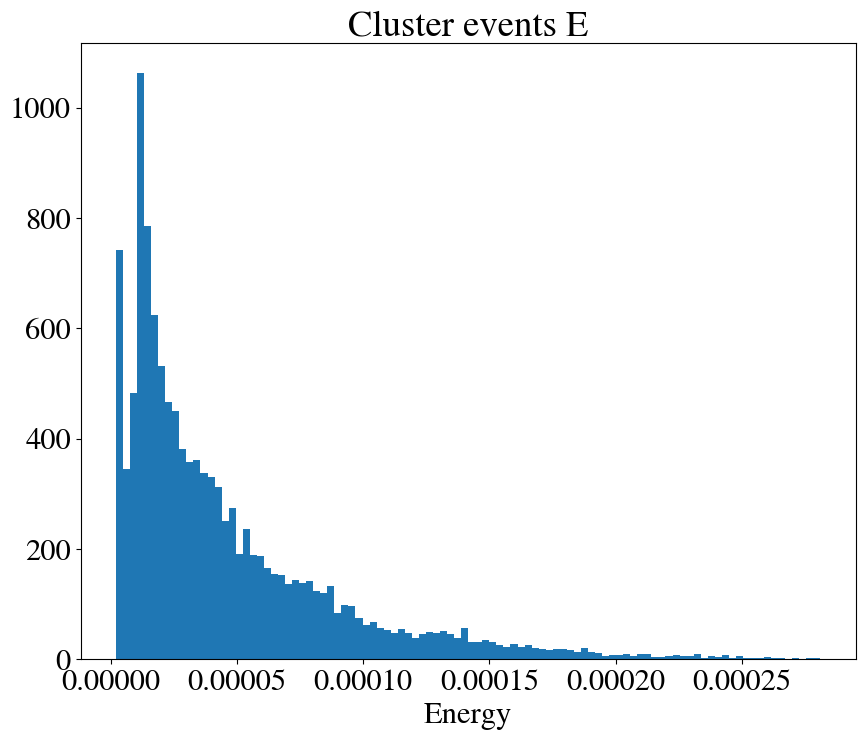

In [38]:
plt.hist(cluster_evt.E, bins = 100)
plt.title("Cluster events E")
plt.xlabel('Energy')
plt.show()

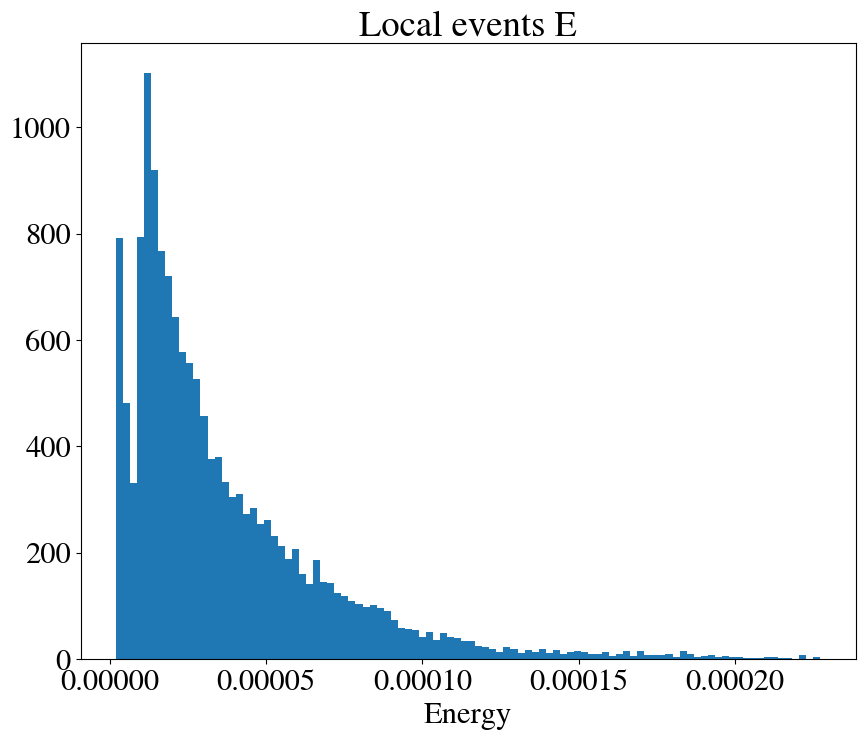

In [39]:
plt.hist(local_evt.E, bins = 100)
plt.title("Local events E")
plt.xlabel('Energy')
plt.show()

Text(0.5, 1.0, 'DECO/Events Energy')

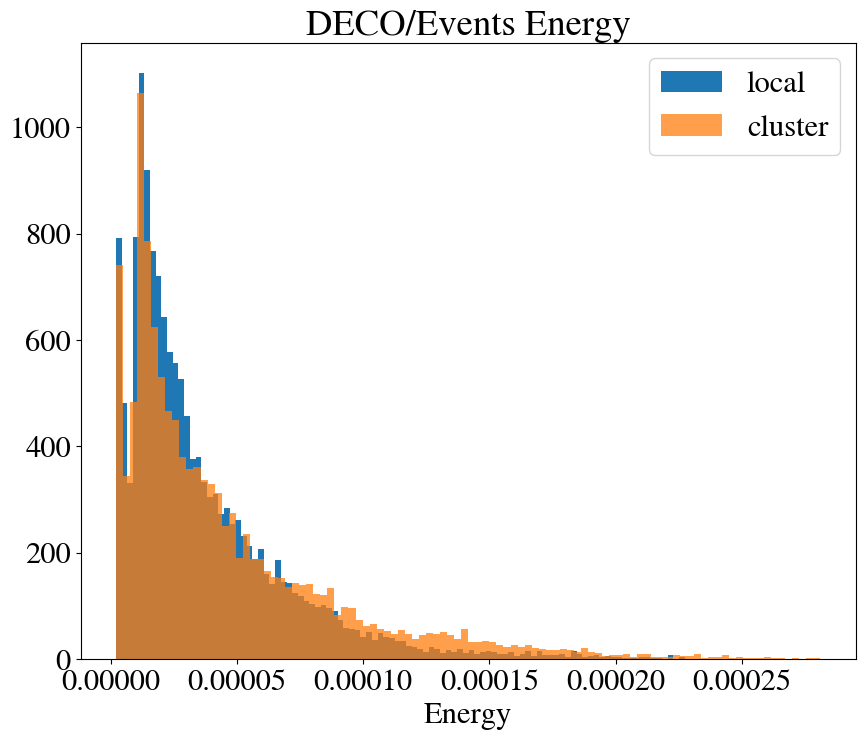

In [44]:
plt.hist(local_evt.E, bins = 100, label = 'local')
plt.hist(cluster_evt.E, bins = 100, label = 'cluster', alpha = 0.75)
plt.legend()
plt.xlabel("Energy")
plt.title("DECO/Events Energy")
